# 1. Importing Modules

In [1]:
# Importing tensorflow and File Management
import tensorflow as tf
import os

# Data Management and Display
import numpy as np
from matplotlib import pyplot as plt

# Image Processing
import cv2
import imghdr

# Model Training Modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Metrics from Keras
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# For Loading Model
from tensorflow.keras.models import load_model

# 2. Data Cleaning

data_dir = 'data' 

image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Unsupported Extension: {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Error with Image: {}'.format(image_path))
            # os.remove(image_path)

# 3. Loading Data

In [2]:
#Import numpy library
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#loading images from dataset
data = tf.keras.utils.image_dataset_from_directory('F:\\DataSets\\Train')

Found 2326 files belonging to 2 classes.


In [4]:
#Convert dataset to numpy iterator
data_iterator = data.as_numpy_iterator()

In [5]:
#get a batch of data
batch = data_iterator.next()

batch

(array([[[[ 94.06799 ,  94.06799 ,  94.06799 ],
          [223.17978 , 223.17978 , 223.17978 ],
          [221.56447 , 221.56447 , 221.56447 ],
          ...,
          [221.6504  , 221.6504  , 221.6504  ],
          [225.20045 , 225.20045 , 225.20045 ],
          [174.80196 , 174.80196 , 174.80196 ]],
 
         [[124.097946, 124.097946, 124.097946],
          [245.10081 , 245.10081 , 245.10081 ],
          [241.71884 , 241.71884 , 241.71884 ],
          ...,
          [253.92569 , 253.92569 , 253.92569 ],
          [254.38443 , 254.38443 , 254.38443 ],
          [197.66911 , 197.66911 , 197.66911 ]],
 
         [[150.14844 , 150.14844 , 150.14844 ],
          [246.86337 , 246.86337 , 246.86337 ],
          [248.24797 , 248.24797 , 248.24797 ],
          ...,
          [252.63281 , 252.63281 , 252.63281 ],
          [254.47647 , 254.47647 , 254.47647 ],
          [196.04688 , 196.04688 , 196.04688 ]],
 
         ...,
 
         [[194.59572 , 194.59572 , 194.59572 ],
          [250.556

255.0

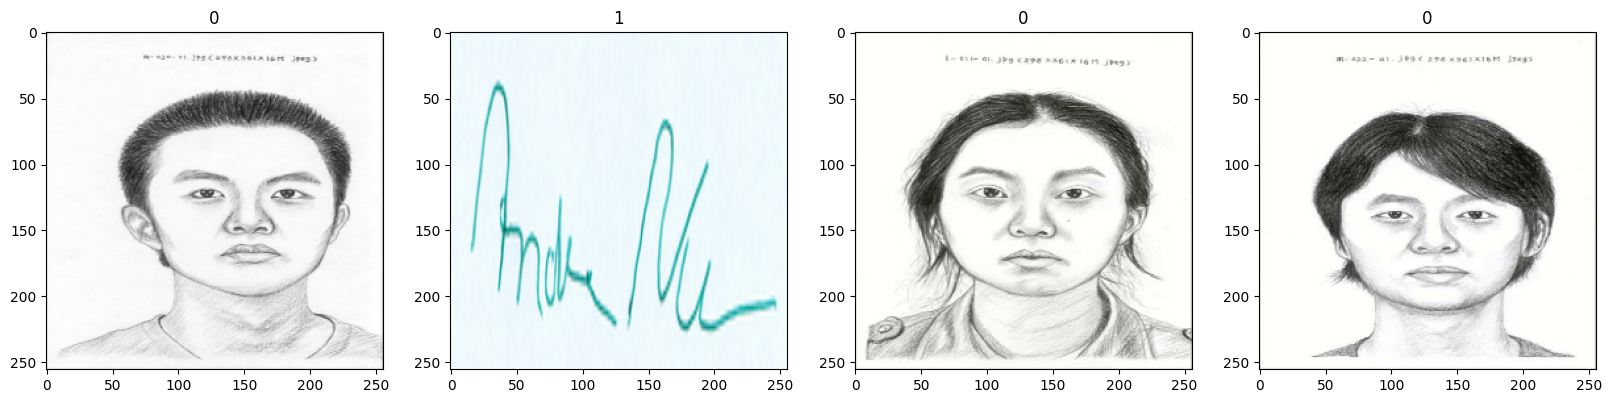

In [6]:
#displaying images from the block
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#maximum pixel value
batch[0].max()

# 4. Data Scaling

In [7]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
data.as_numpy_iterator().next()

(array([[[[0.60750324, 0.6584836 , 0.7212287 ],
          [0.6139696 , 0.66102844, 0.72377354],
          [0.6086675 , 0.6557263 , 0.7184714 ],
          ...,
          [0.512927  , 0.52861327, 0.5752097 ],
          [0.4836981 , 0.49548292, 0.5594334 ],
          [0.4648562 , 0.4948807 , 0.56418216]],
 
         [[0.6128887 , 0.6599475 , 0.7226926 ],
          [0.6117044 , 0.65876323, 0.7215083 ],
          [0.6158825 , 0.6585957 , 0.72278935],
          ...,
          [0.47263998, 0.48875037, 0.54612535],
          [0.506429  , 0.5297746 , 0.592581  ],
          [0.46948242, 0.49946672, 0.5687883 ]],
 
         [[0.61583656, 0.66289544, 0.72564054],
          [0.60923046, 0.65194356, 0.71613723],
          [0.6183948 , 0.6536889 , 0.7203556 ],
          ...,
          [0.47523266, 0.5015807 , 0.55225474],
          [0.48112267, 0.5046521 , 0.5567354 ],
          [0.47146332, 0.5003236 , 0.55884075]],
 
         ...,
 
         [[0.12361845, 0.08048119, 0.07263806],
          [0.12181

# 5. Data Splitting

In [9]:
len(data)

73

In [10]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1)

In [11]:
# Checking if len(data) = sum(test, train, val sizes)
train_size + val_size + test_size

73

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building DL Model

In [13]:
#Creating Empty Sequential Model

model = Sequential()

In [14]:
#defining a CNN in Keras using the Sequential model and several layers

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
#Compiling the defined Keras mode
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Training the Model

In [17]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [18]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
51/51 [==============================] - 69s 1s/step - loss: 0.3156 - accuracy: 0.8517 - val_loss: 0.1048 - val_accuracy: 0.9833
Epoch 2/25
51/51 [==============================] - 57s 1s/step - loss: 0.0598 - accuracy: 0.9841 - val_loss: 0.0405 - val_accuracy: 0.9937
Epoch 3/25
51/51 [==============================] - 58s 1s/step - loss: 0.0399 - accuracy: 0.9884 - val_loss: 0.0628 - val_accuracy: 0.9875
Epoch 4/25
51/51 [==============================] - 64s 1s/step - loss: 0.0233 - accuracy: 0.9933 - val_loss: 0.0713 - val_accuracy: 0.9917
Epoch 5/25
51/51 [==============================] - 74s 1s/step - loss: 0.0342 - accuracy: 0.9926 - val_loss: 0.0873 - val_accuracy: 0.9875
Epoch 6/25
51/51 [==============================] - 57s 1s/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.0470 - val_accuracy: 0.9896
Epoch 7/25
51/51 [==============================] - 57s 1s/step - loss: 0.0104 - accuracy: 0.9975 - val_loss: 0.0172 - val_accuracy: 0.9979
Epoch 8/25
51/51 [==

# 8. Performance Evaluation

### i. Loss

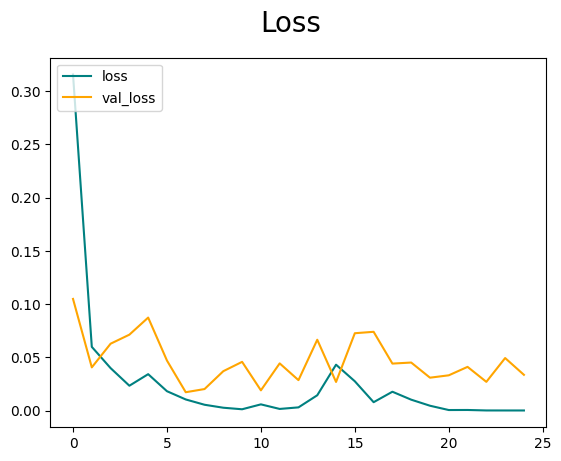

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### ii. Accuracy

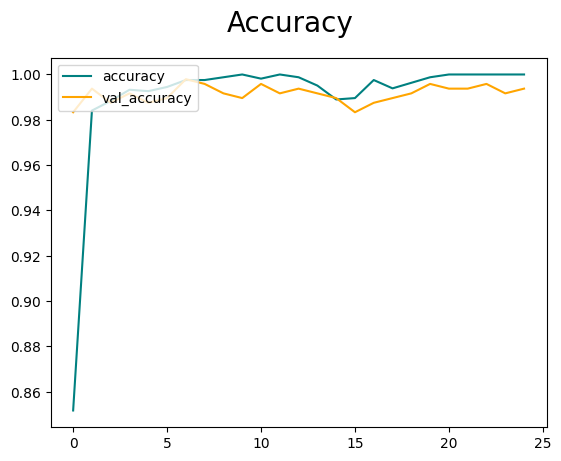

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### iii. Evaluation Metrics

In [21]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 233ms/step


In [22]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.96363634, shape=(), dtype=float32) tf.Tensor(0.99065423, shape=(), dtype=float32)


# 10. Testing

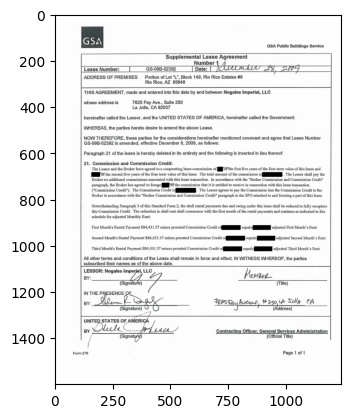

In [33]:
img = cv2.imread('test5.jfif')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

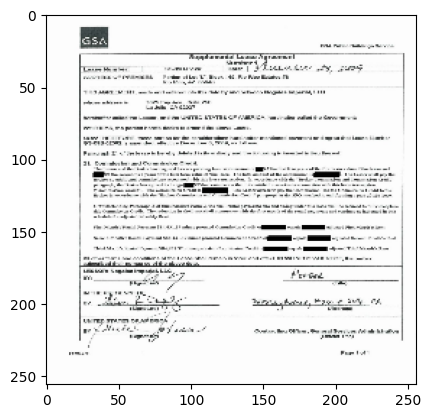

In [34]:
resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 43ms/step


In [36]:
if yhat > 0.5: 
    print(f'Predicted class is Signature')
    print(f"Certainty = {float(yhat)*100}")
else:
    print(f'Predicted class is Portrait')
    print(f"Certainty = {float(1-yhat)*100}")

Predicted class is Signature
Certainty = 84.3981683254242


# 11. Saving the Model

In [27]:
model.save(os.path.join('models','model1.h5'))

In [28]:
#new_model = load_model('C:\\Users\\chana\\Downloads\\models\\imageclassifierez.h5')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5eb307f-57c9-4fe9-995d-1913de4a6e89' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>